In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

In [3]:
def RBF(x, y, xj, yj, sigma=1.0):

  phij = torch.exp((-(x-xj)**2 - (y-yj)**2)/sigma**2)

  return phij


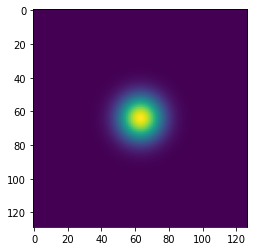

In [4]:
x = torch.linspace(-5, 5, 129)
y = torch.linspace(-5, 5, 127)

# Generate a grid
X, Y = torch.meshgrid(x,y)

xj = 0
yj = 0
phij = RBF(X, Y, xj, yj)

plt.imshow(phij)
plt.show()

In [ ]:
def buildVDMmat(x,y):
  # building the VDM matrix from
  # points x1, y1, x2, y2, .....xn, yn


  n = x.numel()
  Phi = torch.zeros(n, n)

  for j in range(n):
    Phi[:,j] = RBF(x, y, x[j], y[j])
  
  return Phi

In [ ]:
# test VDM matrix
x = torch.randn(1502)
y = torch.randn(1502)

A = buildVDMmat(x,y)

In [ ]:
plt.imshow(A)

In [ ]:
def get_interpolation_coef(x,y,u):
  # build VDM matrix
  A = buildVDMmat(x,y)
  # solve the linear system A*c = u
  c = torch.linalg.solve(A, u)

  return c